In [19]:
%%bq query
SELECT date(pickup_datetime) as YearDay,sum(passenger_count) as Total  FROM 'nyc-tlc:yellow.trips'
where year(pickup_datetime) < 2015 group by YearDay order by YearDay 

invalidQuery: Syntax error: Unexpected string literal 'nyc-tlc:yellow.trips' at [1:77]


In [17]:
import google.datalab.bigquery as bq
import pandas as pd

a = bq.Query('SELECT date(pickup_datetime) as YearDay,sum(passenger_count) as Total  FROM `nyc-tlc.yellow.trips` where Extract(year from (cast(pickup_datetime as date))) < 2015 group by YearDay order by YearDay')

df1 = a.execute(output_options=bq.QueryOutput.dataframe()).result()


QueryResultsTable job_diyZo6m3R9JORhRu7hdECNQA_e0

The query executed in BigQuery is Legacy SQL. However, on Datalab, we require the standard SQL.
1. Instead of quotes (''), I had to use tilde (``) around the table names
2. Year function is not present in Datalab, I had to use extract method additionally, to fetch the year from timestamp

In [40]:
import google.datalab.bigquery as bq
import pandas as pd


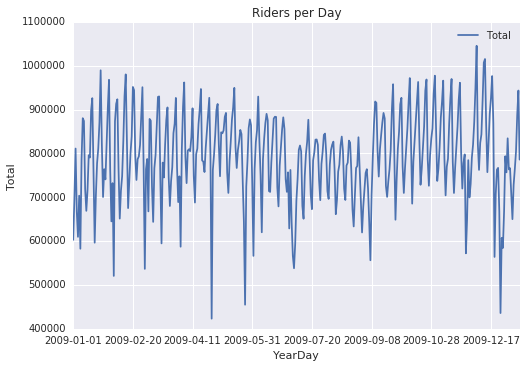

In [41]:
total_riders_2009 = bq.Query('SELECT date(pickup_datetime) as YearDay,sum(passenger_count) as Total  FROM `nyc-tlc.yellow.trips` where date(pickup_datetime) between "2009-01-01" and "2010-01-10" group by YearDay order by YearDay')
df = total_riders_2009.execute(output_options=bq.QueryOutput.dataframe()).result()
ax = df.plot(kind='line',x='YearDay',title='Riders per Day')
ax.set_xlabel('YearDay')
ax.set_ylabel('Total')


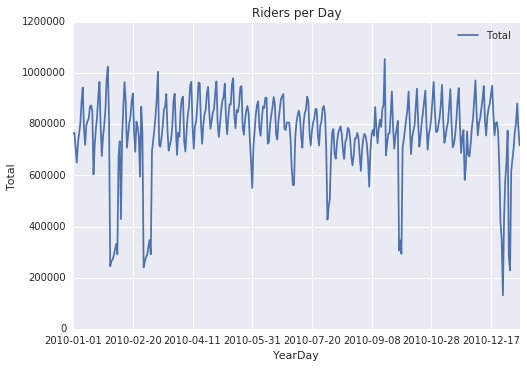

In [42]:
total_riders_2010 = bq.Query('SELECT date(pickup_datetime) as YearDay,sum(passenger_count) as Total  FROM `nyc-tlc.yellow.trips` where date(pickup_datetime) between "2010-01-01" and "2011-01-10" group by YearDay order by YearDay')
df = total_riders_2010.execute(output_options=bq.QueryOutput.dataframe()).result()
ax = df.plot(kind='line',x='YearDay',title='Riders per Day')
ax.set_xlabel('YearDay')
ax.set_ylabel('Total')

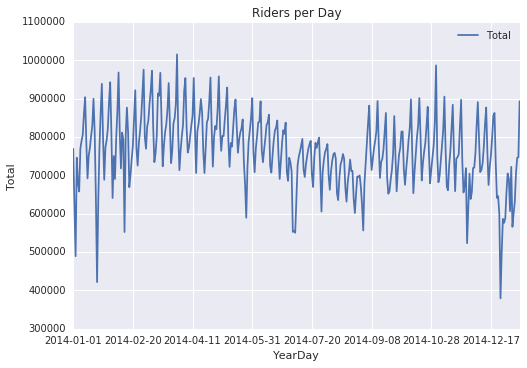

In [46]:
total_riders_2014 = bq.Query('SELECT date(pickup_datetime) as YearDay,sum(passenger_count) as Total  FROM `nyc-tlc.yellow.trips` where date(pickup_datetime) between "2014-01-01" and "2015-01-10" group by YearDay order by YearDay')
df = total_riders_2014.execute(output_options=bq.QueryOutput.dataframe()).result()
ax = df.plot(kind='line',x='YearDay',title='Riders per Day')
ax.set_xlabel('YearDay')
ax.set_ylabel('Total')

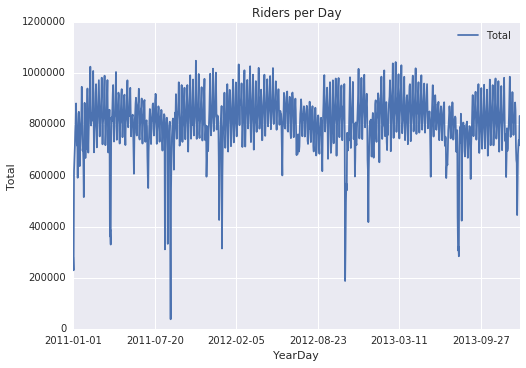

In [49]:
total_riders_111213 = bq.Query('SELECT date(pickup_datetime) as YearDay,sum(passenger_count) as Total  FROM `nyc-tlc.yellow.trips` where Extract(year from (cast(pickup_datetime as date))) in (2011,2012,2013) group by YearDay order by YearDay')
df = total_riders_111213.execute(output_options=bq.QueryOutput.dataframe()).result()
ax = df.plot(kind='line',x='YearDay',title='Riders per Day')
ax.set_xlabel('YearDay')
ax.set_ylabel('Total')

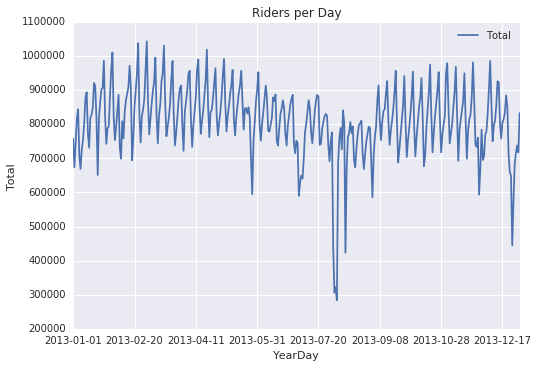

In [50]:
total_riders_111213 = bq.Query('SELECT date(pickup_datetime) as YearDay,sum(passenger_count) as Total  FROM `nyc-tlc.yellow.trips` where Extract(year from (cast(pickup_datetime as date))) in (2013) group by YearDay order by YearDay')
df = total_riders_111213.execute(output_options=bq.QueryOutput.dataframe()).result()
ax = df.plot(kind='line',x='YearDay',title='Riders per Day')
ax.set_xlabel('YearDay')
ax.set_ylabel('Total')